In [1]:
import random
random.seed(42)

Confusion Matrix:
[[ 0  1  0  0  1 39  7 48  4  0]
 [ 0  1 43  1 55  0  0  0  0  0]
 [ 1  8 18  0 19 41  8  0  4  1]
 [44  3  2  3  9  1 35  1  0  2]
 [ 0 31  4 34  5  0  0  0  2 24]
 [28  3  1  0 32  1 30  2  2  1]
 [ 0 10  0  0 11  1  1  2 75  0]
 [ 0  9  5 46 10  0  0  0  0 30]
 [ 4  0 56  0 10  0 27  0  1  2]
 [ 1 14  5 29  6  0  2  1  1 41]]

Accuracy: 0.47


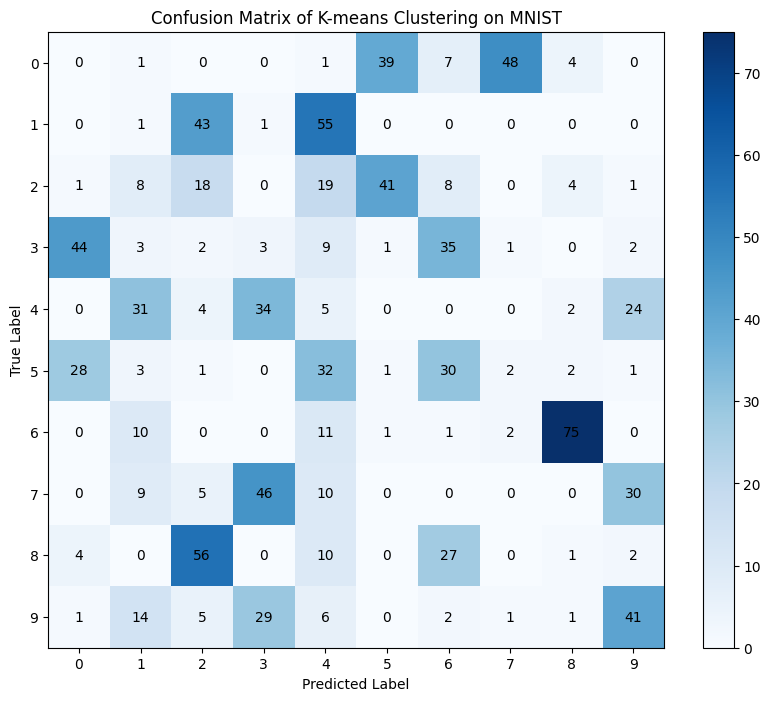

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)


# Select 100 samples from each class
n_samples_per_class = 100
selected_indices = []
for digit in range(10):
    indices = np.where(y == digit)[0]
    selected_indices.extend(indices[:n_samples_per_class])

X_selected = X[selected_indices]
y_selected = y[selected_indices]

# Perform k-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_selected)

# Create confusion matrix
conf_matrix = confusion_matrix(y_selected, cluster_labels)

/Users/saeah/dl_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


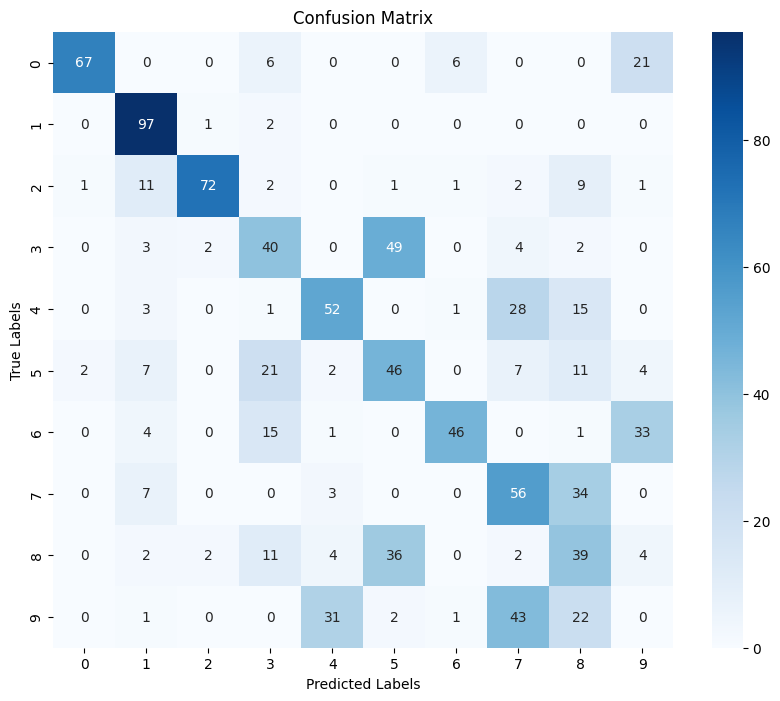

In [3]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
from tensorflow.keras.datasets import mnist

# Load MNIST data
(_, _), (X_test, y_test) = mnist.load_data()

# Select 100 samples per class
samples_per_class = 100
selected_images = []
selected_labels = []
for i in range(10):
    idx = np.where(y_test == i)[0][:samples_per_class]
    selected_images.append(X_test[idx])
    selected_labels.append(y_test[idx])

X = np.concatenate(selected_images).reshape(-1, 28 * 28) / 255.0
y = np.concatenate(selected_labels)

# Apply K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X)

# Compute the cost matrix for the Hungarian Algorithm
cost_matrix = np.zeros((10, 10))
for i in range(10):  # True labels
    for j in range(10):  # Cluster labels
        cost_matrix[i, j] = -np.sum((y == i) & (clusters == j))

# Solve the assignment problem
row_ind, col_ind = linear_sum_assignment(cost_matrix)

# Map clusters to true labels
cluster_to_label = {cluster: label for cluster, label in zip(col_ind, row_ind)}
mapped_clusters = np.array([cluster_to_label[cluster] for cluster in clusters])

# Generate confusion matrix
conf_matrix = confusion_matrix(y, mapped_clusters)

# Print and visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [5]:
# Compute purity from the confusion matrix
def calculate_purity_from_conf_matrix(conf_matrix):
    # Sum the maximum value of each row (most frequent true label in each cluster)
    total_correct = np.sum(np.max(conf_matrix, axis=1))
    
    # Calculate purity
    purity = total_correct / np.sum(conf_matrix)
    return purity

# Calculate purity using the confusion matrix
purity = calculate_purity_from_conf_matrix(conf_matrix)
print(f"Purity: {purity:.4f}")

Purity: 0.5670
